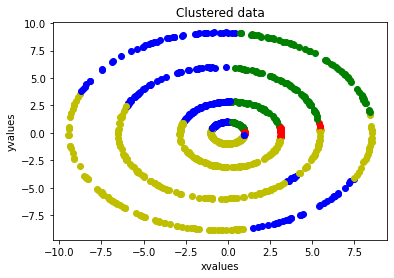

In [1]:
import pandas as pd
import numpy as np
import sys
import random
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
dataset=pd.read_csv('Dataset.csv',header=None,names=['x','y'])
data_array=np.array(dataset)
z=np.zeros(shape=(1000,1))
def comp(x):
    return x[0]
def K(a,b,d):
    return(1+np.dot(a,b.transpose()))**d
def eigvalvec(kernal_matrix): 
    p=[]
    Beta_val,Beta_vec=np.linalg.eig(kernal_matrix)
    Beta_vec = Beta_vec.transpose()
    for i in range(0,1000):
        temp=[Beta_val[i],Beta_vec[i]]
        p.append(temp)
    p.sort(reverse=True,key=comp)
    return p
kernal_matrix=np.zeros(shape=(1000,1000))
for i in range(0,1000):
    for j in range(0,1000):
        kernal_matrix[i][j]=K(data_array[i],data_array[j],2)
p=eigvalvec(kernal_matrix)
top_eig=np.zeros(shape=(4,1000))
for i in range(0,4):
    top_eig[i]=p[i][1]
top_eig=top_eig.transpose()
for i in range(1000):
    z[i]=np.argmax(top_eig[i])

import matplotlib.colors as mcolors
for i in range(0,1000):
    if(z[i]==0):
        plt.scatter(data_array[i][0],data_array[i][1],c='r')
    if(z[i]==1):
        plt.scatter(data_array[i][0],data_array[i][1],c='b')
    if(z[i]==2):
        plt.scatter(data_array[i][0],data_array[i][1],c='g')
    if(z[i]==3):
        plt.scatter(data_array[i][0],data_array[i][1],c='y')
plt.title("Clustered data")
plt.xlabel("xvalues")
plt.ylabel("yvalues")
plt.show()